In [3]:
# Define categories (replace these with the actual folder names)
categories = [
    'Ajanta Caves', 'Akshardham Temple', 'Alai Darwaza', 'Amer Fort',
    'Chhatrapati Shivaji Terminus', 'City Palace', 'Gateway of India',
    'Gol Gumbaz', 'Golden Temple', 'Hawa Mahal', 'Jaisalmer Fort',
    'Lotus Temple', 'Mahabodhi Temple', 'Meenakshi Temple',
    'Nalanda University Ruins', 'Qutub Minar', 'Sanchi Stupa',
    'Sun Temple', 'Taj Mahal', 'Victoria Memorial'
]

category_to_architecture = {
    'Ajanta Caves': 'Buddhist Architecture',
    'Sanchi Stupa': 'Buddhist Architecture',
    'Mahabodhi Temple': 'Buddhist Architecture',
    'Qutub Minar': 'Indo-Islamic Architecture',
    'Alai Darwaza': 'Indo-Islamic Architecture',
    'Gol Gumbaz': 'Indo-Islamic Architecture',
    'Gateway of India': 'Indo-Islamic Architecture',
    'Amer Fort': 'Rajput Architecture',
    'Hawa Mahal': 'Rajput Architecture',
    'City Palace': 'Rajput Architecture',
    'Jaisalmer Fort': 'Rajput Architecture',
    'Meenakshi Temple': 'Dravidian Architecture',
    'Sun Temple': 'Hindu Temple Architecture',
    'Akshardham Temple': 'Hindu Temple Architecture',
    'Golden Temple': 'Sikh Architecture',
    'Victoria Memorial': 'Colonial British Architecture',
    'Chhatrapati Shivaji Terminus': 'Colonial British Architecture',
    'Lotus Temple': 'Modern Architecture',
    'Taj Mahal': 'Indo-Islamic Architecture',
    'Nalanda University Ruins': 'Buddhist Architecture'
}

In [2]:
# Load training and testing data
train_folder = './dataset/training data'
test_folder = './dataset/testing data'

In [3]:
from skimage.feature import hog
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder

def extract_hog_features(image_path, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    """
    Extract HOG features from an image, handling grayscale, RGB, and RGBA inputs.
    """
    image = imread(image_path)  # Read image
    # Handle images with 4 channels (RGBA)
    if len(image.shape) == 3 and image.shape[2] == 4:
        image = image[:, :, :3]  # Strip alpha channel (keep RGB)
    # Convert to grayscale if needed
    if len(image.shape) == 3:  # If it's RGB
        gray_image = rgb2gray(image)
    else:  # Already grayscale
        gray_image = image
    # Extract HOG features
    features = hog(
        gray_image,
        orientations=9,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block,
        block_norm='L2-Hys'
    )
    return features


In [4]:
from skimage.feature import hog
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder

def extract_hog_features(image_path, target_size=(128, 128), pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    """
    Extract HOG features from an image after resizing it to a consistent size.
    """
    try:
        # Read the image
        image = imread(image_path)
        # Handle images with 4 channels (RGBA)
        if len(image.shape) == 3 and image.shape[2] == 4:
            image = image[:, :, :3]  # Strip alpha channel (keep RGB)
        # Convert to grayscale if needed
        if len(image.shape) == 3:  # If it's RGB
            gray_image = rgb2gray(image)
        else:  # Already grayscale
            gray_image = image
        # Resize image to target size
        resized_image = resize(gray_image, target_size, anti_aliasing=True)
        # Extract HOG features
        features = hog(
            resized_image,
            orientations=9,
            pixels_per_cell=pixels_per_cell,
            cells_per_block=cells_per_block,
            block_norm='L2-Hys'
        )
        return features
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

def process_dataset_with_hog(directory, target_size=(128, 128)):
    """
    Process the dataset directory to extract HOG features and labels.
    """
    features = []
    labels = []
    label_encoder = LabelEncoder()
    class_names = sorted(os.listdir(directory))
    label_encoder.fit(class_names)
    print("Processing dataset...")
    
    for class_name in class_names:
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            print(f"Processing class: {class_name}")
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                feature = extract_hog_features(image_path, target_size=target_size)
                if feature is not None:
                    features.append(feature)
                    labels.append(class_name)
    
    # Convert features and labels to numpy arrays
    features = np.array(features)
    labels = label_encoder.transform(labels)
    return features, labels, label_encoder

In [5]:
# Extract HOG features with consistent image resizing
train_features, train_labels, label_encoder = process_dataset_with_hog(train_folder, target_size=(128, 128))

# Check the shapes of the extracted features
print("Train features shape:", train_features.shape)

Processing dataset...
Processing class: Ajanta Caves
Processing class: Akshardham Temple
Processing class: Alai Darwaza
Processing class: Amer Fort
Processing class: Chhatrapati Shivaji Terminus
Processing class: City Palace
Processing class: Gateway of India
Processing class: Gol Gumbaz
Processing class: Golden Temple
Processing class: Hawa Mahal
Error processing image ./dataset/training data\Hawa Mahal\Image_26.gif: output_shape length cannot be smaller than the image number of dimensions
Processing class: Jaisalmer Fort
Processing class: Lotus Temple
Processing class: Mahabodhi Temple
Error processing image ./dataset/training data\Mahabodhi Temple\Image_85.gif: output_shape length cannot be smaller than the image number of dimensions
Processing class: Meenakshi Temple
Processing class: Nalanda University Ruins
Processing class: Qutub Minar
Processing class: Sanchi Stupa
Processing class: Sun Temple
Processing class: Taj Mahal
Processing class: Victoria Memorial
Train features shape:

In [6]:
test_features, test_labels, _ = process_dataset_with_hog(test_folder, target_size=(128, 128))
print("Test features shape:", test_features.shape)

Processing dataset...
Processing class: Ajanta Caves
Processing class: Akshardham Temple
Processing class: Alai Darwaza
Processing class: Amer Fort
Processing class: Chhatrapati Shivaji Terminus
Processing class: City Palace
Processing class: Gateway of India
Processing class: Gol Gumbaz
Error processing image ./dataset/testing data\Gol Gumbaz\Image_22.gif: output_shape length cannot be smaller than the image number of dimensions
Error processing image ./dataset/testing data\Gol Gumbaz\Image_30.gif: the input array must have size 3 along `channel_axis`, got (1, 1000, 1024)
Processing class: Golden Temple
Processing class: Hawa Mahal
Processing class: Jaisalmer Fort
Processing class: Lotus Temple
Processing class: Mahabodhi Temple
Processing class: Meenakshi Temple
Processing class: Nalanda University Ruins
Processing class: Qutub Minar
Processing class: Sanchi Stupa
Processing class: Sun Temple
Processing class: Taj Mahal
Processing class: Victoria Memorial
Test features shape: (582, 8

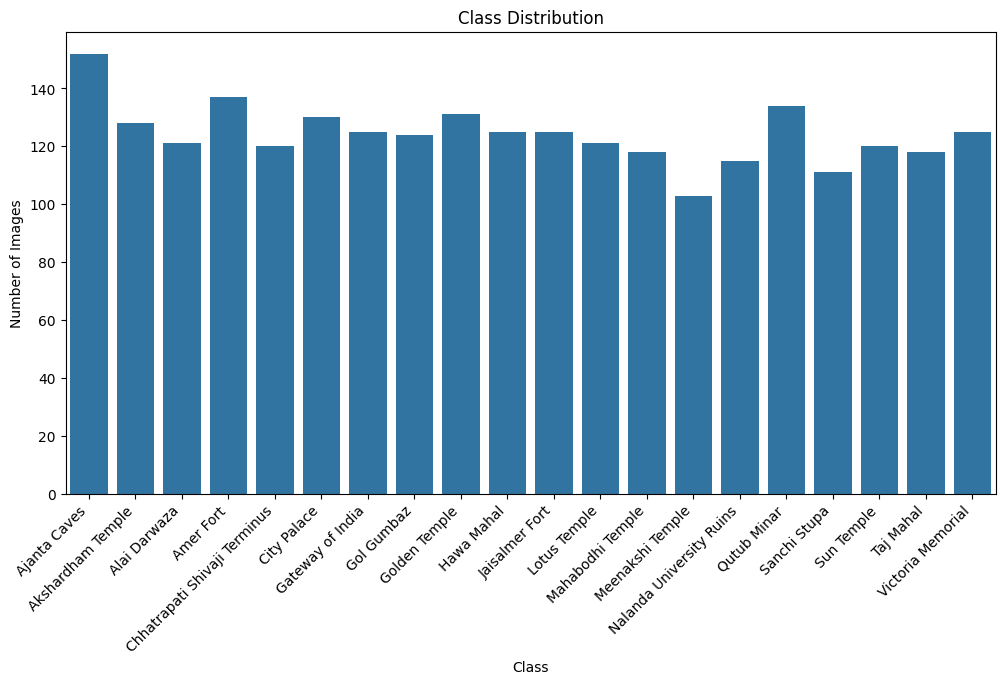

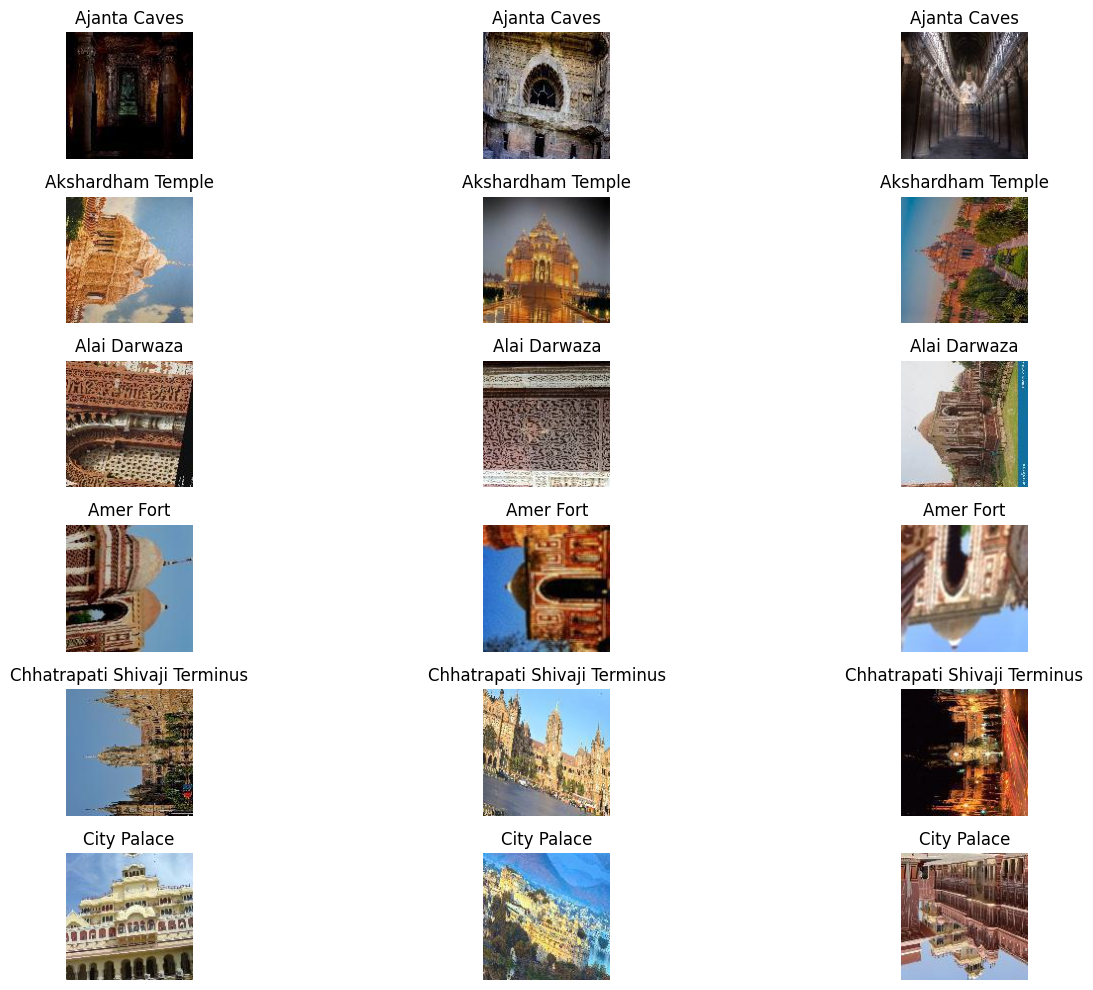

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from skimage.io import imshow

# Visualize class distribution
def plot_class_distribution(labels, class_names):
    label_counts = Counter(labels)
    class_counts = {class_names[label]: count for label, count in label_counts.items()}
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.xticks(rotation=45, ha='right')
    plt.title("Class Distribution")
    plt.ylabel("Number of Images")
    plt.xlabel("Class")
    plt.show()

# Show sample images from each class
def plot_sample_images(directory, class_names, num_samples=3):
    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(class_names[:6]):  # Display 6 classes
        class_path = os.path.join(directory, class_name)
        images = os.listdir(class_path)[:num_samples]
        for j, image_name in enumerate(images):
            image_path = os.path.join(class_path, image_name)
            image = imread(image_path)
            plt.subplot(len(class_names[:6]), num_samples, i * num_samples + j + 1)
            plt.imshow(image)
            plt.title(class_name)
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Visualizations
plot_class_distribution(train_labels, label_encoder.classes_)
plot_sample_images(train_folder, label_encoder.classes_)


Training Logistic Regression...


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating Logistic Regression...
Accuracy: 0.62

Classification Report:
                              precision    recall  f1-score   support

                Ajanta Caves       0.56      1.00      0.72        23
           Akshardham Temple       0.68      0.52      0.59        33
                Alai Darwaza       0.62      0.82      0.71        28
                   Amer Fort       0.43      0.40      0.41        30
Chhatrapati Shivaji Terminus       0.56      0.60      0.58        25
                 City Palace       0.39      0.37      0.38        30
            Gateway of India       0.73      0.73      0.73        30
                  Gol Gumbaz       0.63      0.63      0.63        27
               Golden Temple       0.73      0.37      0.49        30
                  Hawa Mahal       0.64      0.77      0.70        30
              Jaisalmer Fort       0.58      0.47      0.52        30
                Lotus Temple       0.86      0.83      0.84        29
            Maha

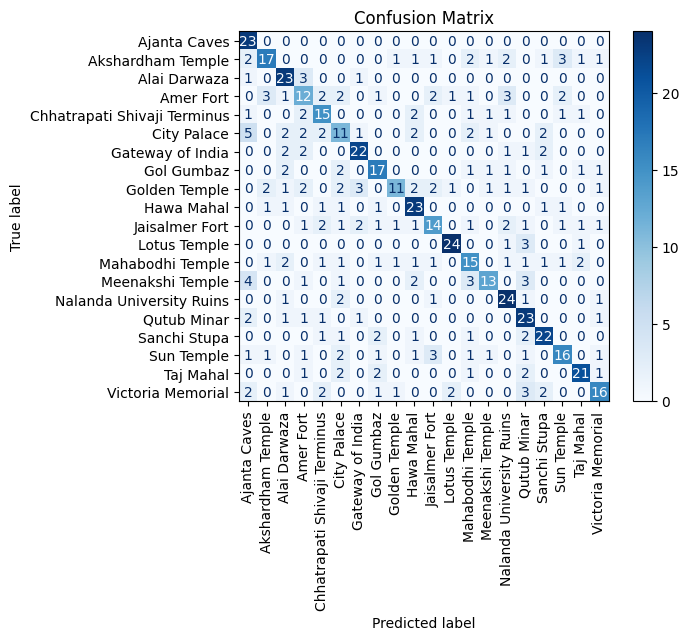


Plotting ROC-AUC Curve...


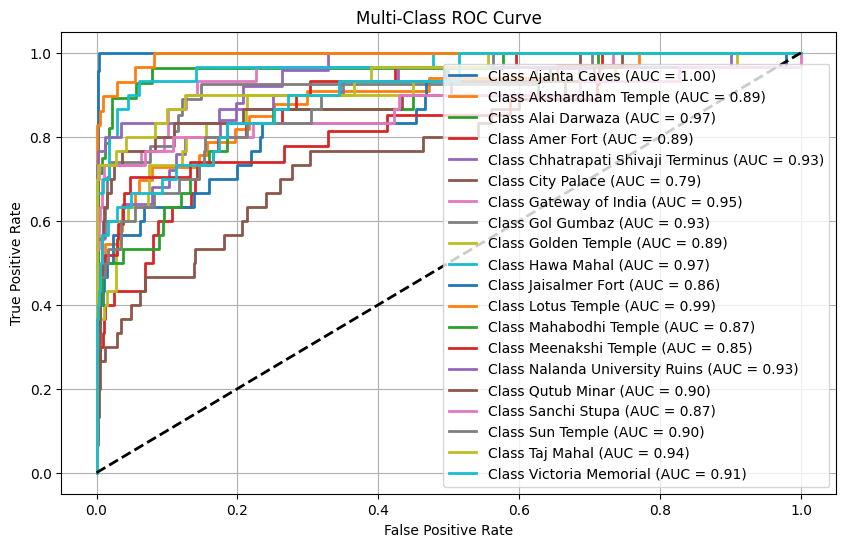


Plotting Precision-Recall Curve...


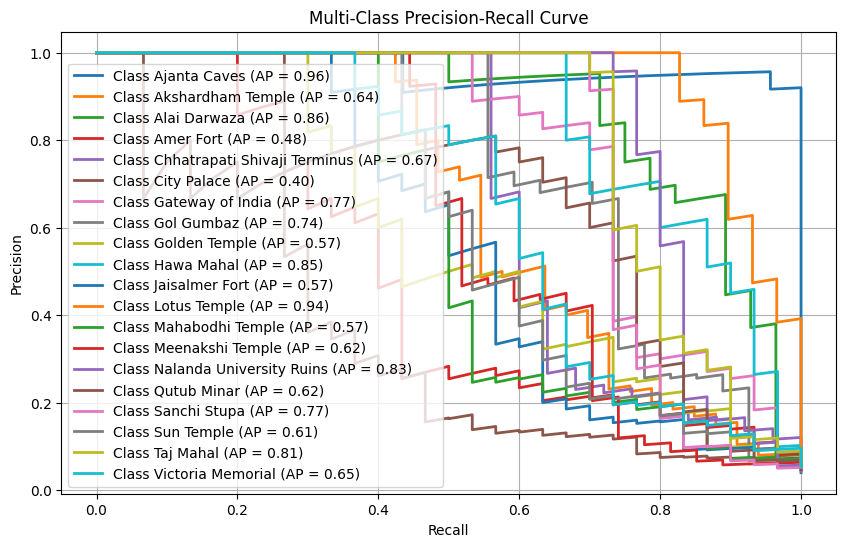

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc,
    precision_recall_curve,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
import numpy as np

# Train Logistic Regression
def train_logistic_regression(train_features, train_labels):
    print("Training Logistic Regression...")
    logistic_model = LogisticRegression(max_iter=500, random_state=42)
    logistic_model.fit(train_features, train_labels)
    return logistic_model

# Evaluate Logistic Regression
def evaluate_logistic_regression(model, test_features, test_labels, label_encoder):
    print("Evaluating Logistic Regression...")
    predictions = model.predict(test_features)
    probabilities = model.predict_proba(test_features)  # For ROC and Precision-Recall curves

    # Accuracy
    accuracy = accuracy_score(test_labels, predictions)
    print(f"Accuracy: {accuracy:.2f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(test_labels, predictions, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(test_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

    # ROC-AUC Curve
    plot_roc_curve(model, test_features, test_labels, label_encoder, probabilities)

    # Precision-Recall Curve
    plot_precision_recall_curve(test_labels, probabilities, label_encoder)

# Plot ROC Curve
def plot_roc_curve(model, test_features, test_labels, label_encoder, probabilities):
    print("\nPlotting ROC-AUC Curve...")
    n_classes = len(label_encoder.classes_)
    test_labels_bin = label_binarize(test_labels, classes=range(n_classes))

    # Compute ROC curve and ROC area for each class
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], probabilities[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    for i, label in enumerate(label_encoder.classes_):
        plt.plot(fpr[i], tpr[i], lw=2, label=f"Class {label} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-Class ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Plot Precision-Recall Curve
def plot_precision_recall_curve(test_labels, probabilities, label_encoder):
    print("\nPlotting Precision-Recall Curve...")
    n_classes = len(label_encoder.classes_)
    test_labels_bin = label_binarize(test_labels, classes=range(n_classes))

    # Compute Precision-Recall curve for each class
    precision, recall, avg_precision = dict(), dict(), dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(test_labels_bin[:, i], probabilities[:, i])
        avg_precision[i] = auc(recall[i], precision[i])

    # Plot Precision-Recall curves
    plt.figure(figsize=(10, 6))
    for i, label in enumerate(label_encoder.classes_):
        plt.plot(recall[i], precision[i], lw=2, label=f"Class {label} (AP = {avg_precision[i]:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Multi-Class Precision-Recall Curve")
    plt.legend(loc="lower left")
    plt.grid()
    plt.show()

# Train, Evaluate, and Visualize Logistic Regression
logistic_model = train_logistic_regression(train_features, train_labels)
evaluate_logistic_regression(logistic_model, test_features, test_labels, label_encoder)



Training Random Forest Classifier...

Random Forest - Accuracy: 0.56

Classification Report:
                              precision    recall  f1-score   support

                Ajanta Caves       0.42      1.00      0.59        23
           Akshardham Temple       0.75      0.45      0.57        33
                Alai Darwaza       0.45      0.79      0.57        28
                   Amer Fort       0.35      0.43      0.39        30
Chhatrapati Shivaji Terminus       0.56      0.56      0.56        25
                 City Palace       0.32      0.30      0.31        30
            Gateway of India       0.61      0.57      0.59        30
                  Gol Gumbaz       0.67      0.59      0.63        27
               Golden Temple       0.57      0.43      0.49        30
                  Hawa Mahal       0.63      0.63      0.63        30
              Jaisalmer Fort       0.36      0.30      0.33        30
                Lotus Temple       0.86      0.83      0.84      

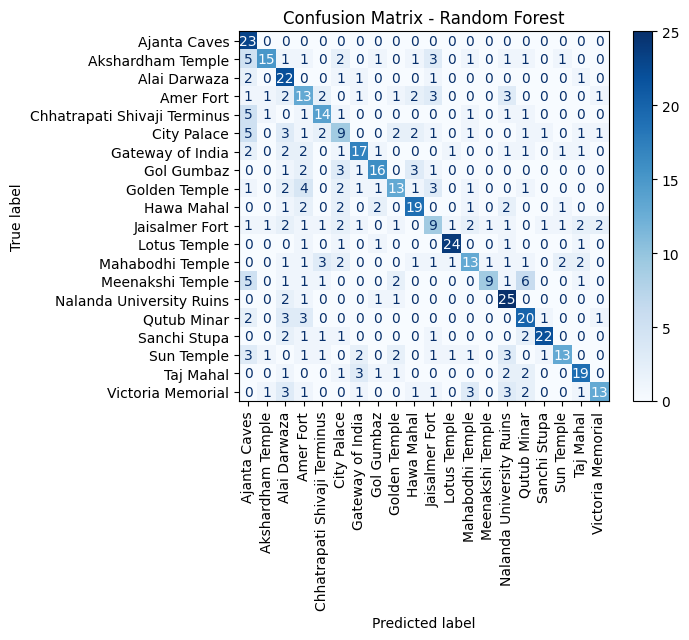

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Train and Evaluate Random Forest Classifier
def train_random_forest(train_features, train_labels, test_features, test_labels, label_encoder):
    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    print("\nTraining Random Forest Classifier...")
    rf_model.fit(train_features, train_labels)

    # Predictions
    predictions = rf_model.predict(test_features)

    # Evaluate Accuracy
    accuracy = accuracy_score(test_labels, predictions)
    print(f"\nRandom Forest - Accuracy: {accuracy:.2f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(test_labels, predictions, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(test_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='d')
    plt.title("Confusion Matrix - Random Forest")
    plt.show()



# Call the function
train_random_forest(train_features, train_labels, test_features, test_labels, label_encoder)


If your dataset is imbalanced, set class_weight='balanced' to assign weights inversely proportional to class frequencies.


Training Random Forest Classifier...

Random Forest - Accuracy: 0.60

Classification Report:
                              precision    recall  f1-score   support

                Ajanta Caves       0.42      1.00      0.59        23
           Akshardham Temple       0.62      0.48      0.54        33
                Alai Darwaza       0.59      0.86      0.70        28
                   Amer Fort       0.38      0.37      0.37        30
Chhatrapati Shivaji Terminus       0.55      0.68      0.61        25
                 City Palace       0.40      0.40      0.40        30
            Gateway of India       0.86      0.60      0.71        30
                  Gol Gumbaz       0.69      0.67      0.68        27
               Golden Temple       0.67      0.33      0.44        30
                  Hawa Mahal       0.75      0.80      0.77        30
              Jaisalmer Fort       0.62      0.50      0.56        30
                Lotus Temple       0.77      0.83      0.80      

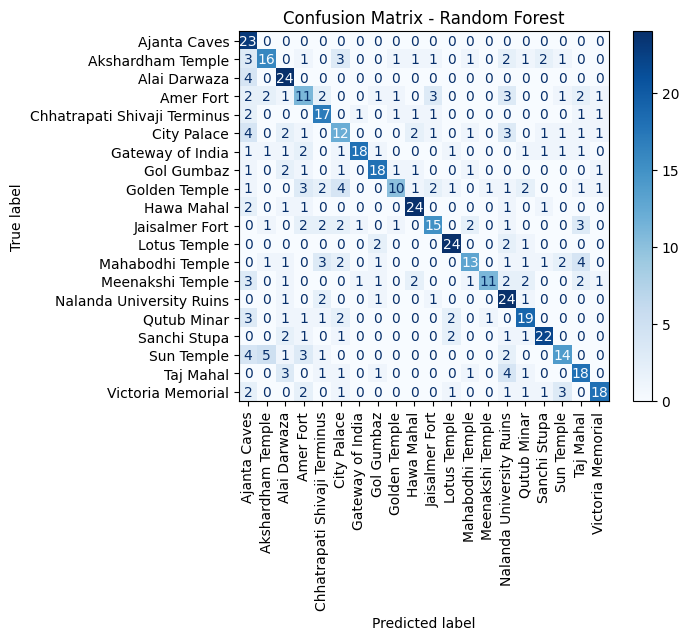

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Train and Evaluate Random Forest Classifier
def train_random_forest(train_features, train_labels, test_features, test_labels, label_encoder):
    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

    print("\nTraining Random Forest Classifier...")
    rf_model.fit(train_features, train_labels)

    # Predictions
    predictions = rf_model.predict(test_features)

    # Evaluate Accuracy
    accuracy = accuracy_score(test_labels, predictions)
    print(f"\nRandom Forest - Accuracy: {accuracy:.2f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(test_labels, predictions, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(test_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='d')
    plt.title("Confusion Matrix - Random Forest")
    plt.show()



# Call the function
train_random_forest(train_features, train_labels, test_features, test_labels, label_encoder)



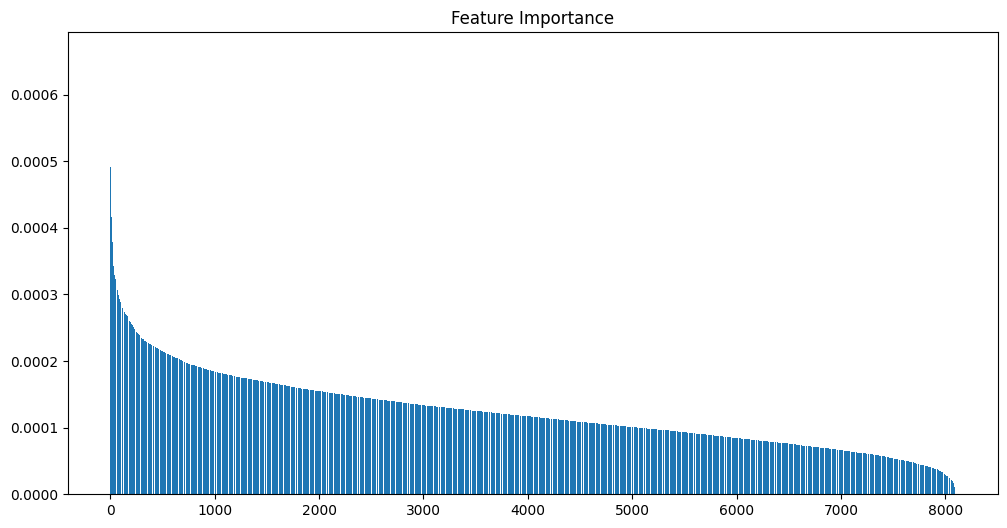

In [14]:
# Plot feature importance
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance(model, feature_names=None):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(importances)), importances[indices], align="center")
    if feature_names is not None:
        plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
    plt.title("Feature Importance")
    plt.show()

# Train and plot feature importance for Random Forest
rf_model.fit(train_features, train_labels)
plot_feature_importance(rf_model)



Training XGBoost...

XGBoost - Accuracy: 0.58

Classification Report:
                              precision    recall  f1-score   support

                Ajanta Caves       0.47      1.00      0.64        23
           Akshardham Temple       0.76      0.48      0.59        33
                Alai Darwaza       0.63      0.86      0.73        28
                   Amer Fort       0.28      0.27      0.27        30
Chhatrapati Shivaji Terminus       0.50      0.60      0.55        25
                 City Palace       0.34      0.33      0.34        30
            Gateway of India       0.56      0.63      0.59        30
                  Gol Gumbaz       0.62      0.67      0.64        27
               Golden Temple       0.79      0.37      0.50        30
                  Hawa Mahal       0.72      0.77      0.74        30
              Jaisalmer Fort       0.39      0.37      0.38        30
                Lotus Temple       0.82      0.79      0.81        29
            Mahabo

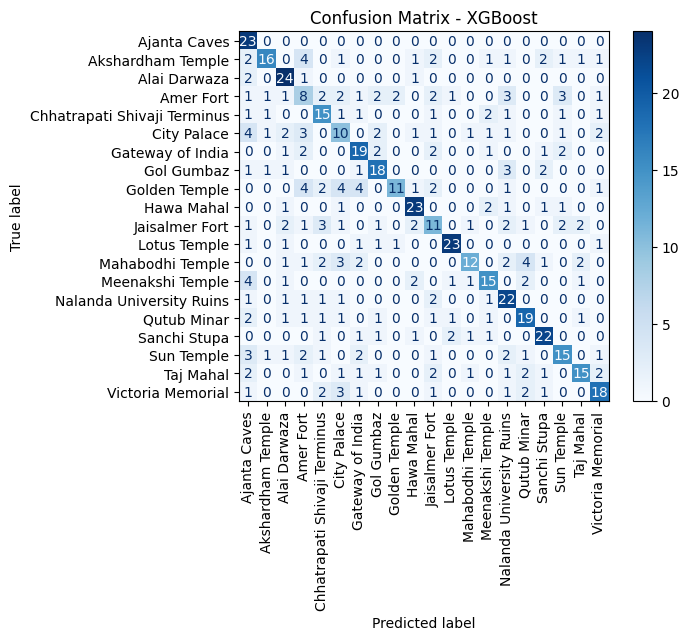

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Train and evaluate XGBoost
def train_xgboost(train_features, train_labels, test_features, test_labels, label_encoder):
    # Initialize XGBoost model
    xgb_model = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        objective='multi:softmax',
        num_class=len(label_encoder.classes_),
        random_state=42
    )

    print("\nTraining XGBoost...")
    xgb_model.fit(train_features, train_labels)

    # Predictions
    predictions = xgb_model.predict(test_features)

    # Evaluate accuracy
    accuracy = accuracy_score(test_labels, predictions)
    print(f"\nXGBoost - Accuracy: {accuracy:.2f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(test_labels, predictions, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(test_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='d')
    plt.title("Confusion Matrix - XGBoost")
    plt.show()

# Call the function
train_xgboost(train_features, train_labels, test_features, test_labels, label_encoder)



Training XGBoost...

XGBoost - Accuracy: 0.61

Classification Report:
                              precision    recall  f1-score   support

                Ajanta Caves       0.48      1.00      0.65        23
           Akshardham Temple       0.78      0.55      0.64        33
                Alai Darwaza       0.63      0.86      0.73        28
                   Amer Fort       0.50      0.37      0.42        30
Chhatrapati Shivaji Terminus       0.52      0.60      0.56        25
                 City Palace       0.42      0.37      0.39        30
            Gateway of India       0.60      0.60      0.60        30
                  Gol Gumbaz       0.62      0.67      0.64        27
               Golden Temple       0.78      0.47      0.58        30
                  Hawa Mahal       0.76      0.73      0.75        30
              Jaisalmer Fort       0.48      0.40      0.44        30
                Lotus Temple       0.79      0.79      0.79        29
            Mahabo

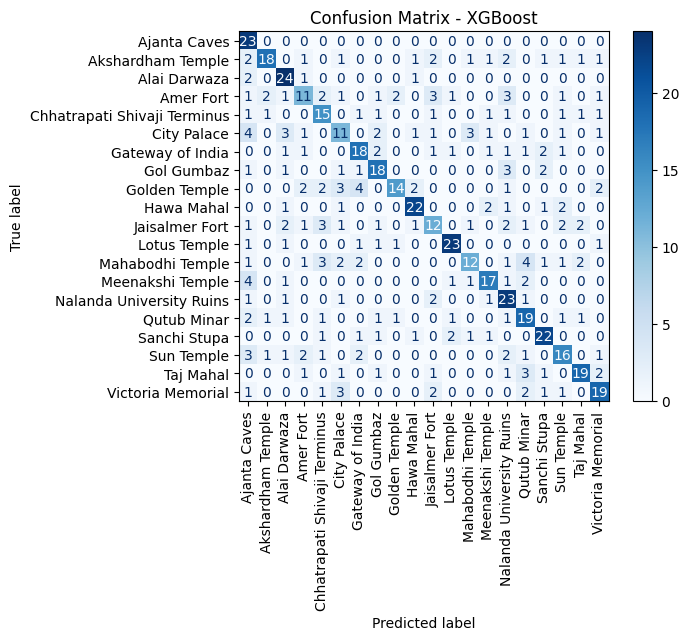

In [25]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Train and evaluate XGBoost
def train_xgboost(train_features, train_labels, test_features, test_labels, label_encoder):
    # Initialize XGBoost model
    xgb_model = xgb.XGBClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        objective='multi:softmax',
        num_class=len(label_encoder.classes_),
        random_state=42
    )

    print("\nTraining XGBoost...")
    xgb_model.fit(train_features, train_labels)

    # Predictions
    predictions = xgb_model.predict(test_features)

    # Evaluate accuracy
    accuracy = accuracy_score(test_labels, predictions)
    print(f"\nXGBoost - Accuracy: {accuracy:.2f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(test_labels, predictions, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(test_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='d')
    plt.title("Confusion Matrix - XGBoost")
    plt.show()

# Call the function
train_xgboost(train_features, train_labels, test_features, test_labels, label_encoder)


Training Stacking Classifier...


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:16:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

Evaluating Stacking Classifier...
Accuracy: 0.62

Classification Report:
                              precision    recall  f1-score   support

                Ajanta Caves       0.56      1.00      0.72        23
           Akshardham Temple       0.65      0.52      0.58        33
                Alai Darwaza       0.70      0.82      0.75        28
                   Amer Fort       0.35      0.37      0.36        30
Chhatrapati Shivaji Terminus       0.58      0.60      0.59        25
                 City Palace       0.47      0.30      0.37        30
            Gateway of India       0.69      0.67      0.68        30
                  Gol Gumbaz       0.60      0.67      0.63        27
               Golden Temple       0.85      0.37      0.51        30
                  Hawa Mahal       0.71      0.80      0.75        30
              Jaisalmer Fort       0.64      0.47      0.54        30
                Lotus Temple       0.92      0.83      0.87        29
            Maha

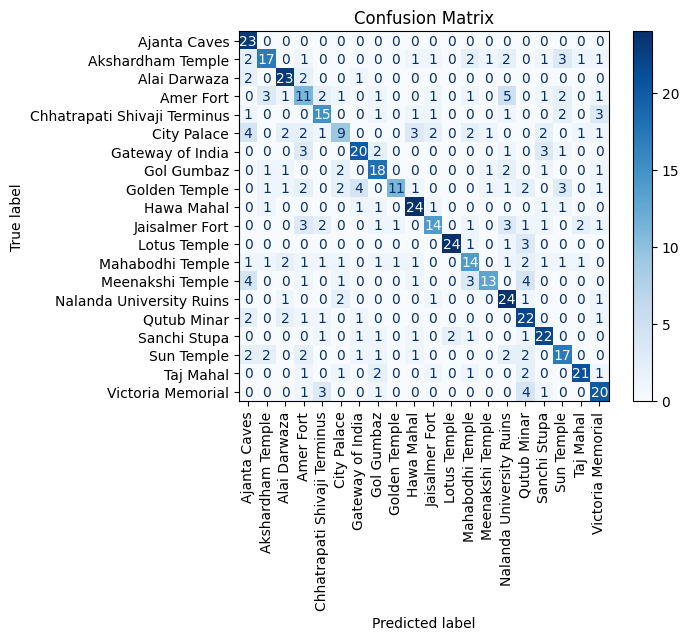


Plotting ROC-AUC Curve...


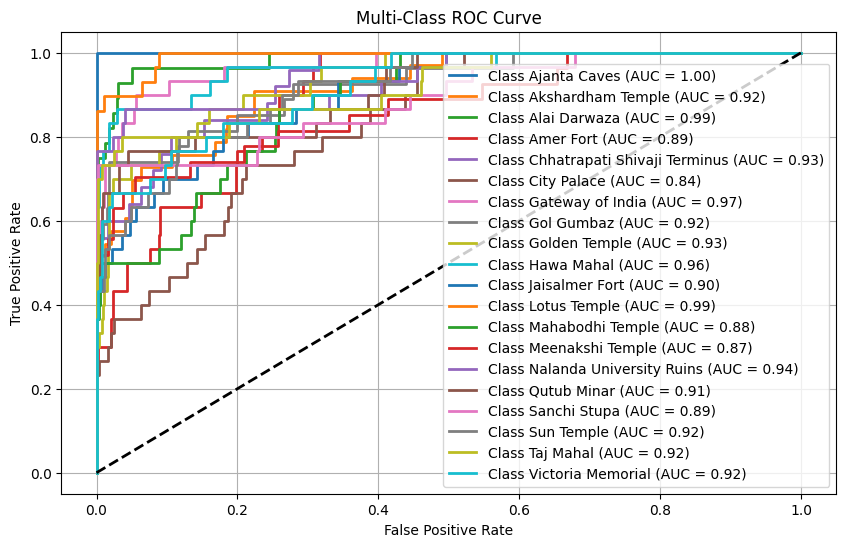

In [26]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Train Stacking Classifier
def train_stacking_classifier(train_features, train_labels):
    print("Training Stacking Classifier...")

    # Base learners
    base_learners = [
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('lr', LogisticRegression(max_iter=500)),
        ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
    ]

    # Meta-model (Logistic Regression)
    meta_model = LogisticRegression()

    # Create stacking classifier
    stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

    # Train model
    stacking_model.fit(train_features, train_labels)
    return stacking_model

# Evaluate Stacking Classifier
def evaluate_stacking_classifier(model, test_features, test_labels, label_encoder):
    print("Evaluating Stacking Classifier...")

    # Predictions and probabilities
    predictions = model.predict(test_features)
    probabilities = model.predict_proba(test_features)  # For ROC and Precision-Recall curves

    # Accuracy
    accuracy = accuracy_score(test_labels, predictions)
    print(f"Accuracy: {accuracy:.2f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(test_labels, predictions, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(test_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

    # ROC-AUC Curve
    plot_roc_curve(model, test_features, test_labels, label_encoder, probabilities)

# Plot ROC Curve
def plot_roc_curve(model, test_features, test_labels, label_encoder, probabilities):
    print("\nPlotting ROC-AUC Curve...")
    n_classes = len(label_encoder.classes_)
    test_labels_bin = label_binarize(test_labels, classes=range(n_classes))

    # Compute ROC curve and ROC area for each class
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], probabilities[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    for i, label in enumerate(label_encoder.classes_):
        plt.plot(fpr[i], tpr[i], lw=2, label=f"Class {label} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-Class ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()



stacking_model = train_stacking_classifier(train_features, train_labels)
evaluate_stacking_classifier(stacking_model, test_features, test_labels, label_encoder)
